In [5]:
import pandas as pd

In [8]:
# Load the dataset
merged_data = pd.read_csv("merged_data.csv")

# Count the missing values for 'Sentiment_Score' grouped by 'Ticker'
missing_values_by_ticker = merged_data[merged_data['Sentiment_Score'].isnull()].groupby('Ticker').size()

# Get the top 20 tickers with the most missing values in 'Sentiment_Score'
top_20_missing = missing_values_by_ticker.sort_values(ascending=False).head(20)
print(top_20_missing)
# Map the tickers to their respective company names
company_name_mapping = {
    "MSFT": "Microsoft Corp",
    "AAPL": "Apple Inc",
    "NVDA": "NVIDIA Corp",
    "AMZN": "Amazon.com Inc",
    "META": "Meta Platforms Inc",
    "TSLA": "Tesla Inc",
    "GOOGL": "Alphabet Inc",
    "GOOG": "Alphabet Inc",
    "AVGO": "Broadcom Inc",
    "PEP": "PepsiCo Inc",
    "COST": "Costco Wholesale Corp",
    "ADBE": "Adobe Inc",
    "CSCO": "Cisco Systems Inc",
    "NFLX": "Netflix Inc",
    "AMD": "Advanced Micro Devices Inc",
    "CMCSA": "Comcast Corp",
    "TMUS": "T-Mobile US Inc",
    "TXN": "Texas Instruments Inc",
    "INTC": "Intel Corp",
    "HON": "Honeywell International Inc",
    "INTU": "Intuit Inc",
    "QCOM": "QUALCOMM Inc",
    "ISRG": "Intuitive Surgical Inc",
    "AMGN": "Amgen Inc",
    "AMAT": "Applied Materials Inc",
    "SBUX": "Starbucks Corp",
    "BKNG": "Booking Holdings Inc",
    "ADI": "Analog Devices Inc",
    "MDLZ": "Mondelez International Inc",
    "GILD": "Gilead Sciences Inc",
    "ADP": "Automatic Data Processing Inc",
    "VRTX": "Vertex Pharmaceuticals Inc",
    "LRCX": "Lam Research Corp",
    "PYPL": "PayPal Holdings Inc",
    "REGN": "Regeneron Pharmaceuticals Inc",
    "PANW": "Palo Alto Networks Inc",
    "ATVI": "Activision Blizzard Inc",
    "MU": "Micron Technology Inc",
    "CSX": "CSX Corp",
    "SNPS": "Synopsys Inc",
    "KLAC": "KLA Corp",
    "ASML": "ASML Holding NV",
    "CDNS": "Cadence Design Systems Inc",
    "FTNT": "Fortinet Inc",
    "ORLY": "O'Reilly Automotive Inc",
    "MNST": "Monster Beverage Corp",
    "MAR": "Marriott International Inc/MD",
    "CHTR": "Charter Communications Inc",
    "MELI": "MercadoLibre Inc",
    "ABNB": "Airbnb Inc",
    "NXPI": "NXP Semiconductors NV",
    "MRVL": "Marvell Technology Inc",
    "DXCM": "Dexcom Inc",
    "CTAS": "Cintas Corp",
    "MCHP": "Microchip Technology Inc",
    "MRNA": "Moderna Inc",
    "LULU": "Lululemon Athletica Inc",
    "ADSK": "Autodesk Inc",
    "PDD": "PDD Holdings Inc ADR",
    "WDAY": "Workday Inc",
    "PCAR": "PACCAR Inc",
    "AEP": "American Electric Power Co Inc",
    "KDP": "Keurig Dr Pepper Inc",
    "KHC": "Kraft Heinz Co/The",
    "IDXX": "IDEXX Laboratories Inc",
    "CPRT": "Copart Inc",
    "PAYX": "Paychex Inc",
    "ON": "ON Semiconductor Corp",
    "EXC": "Exelon Corp",
    "ODFL": "Old Dominion Freight Line Inc",
    "BIIB": "Biogen Inc",
    "AZN": "AstraZeneca PLC ADR",
    "ROST": "Ross Stores Inc",
    "GEHC": "GE HealthCare Technologies Inc",
    "EA": "Electronic Arts Inc",
    "SGEN": "Seagen Inc",
    "CSGP": "CoStar Group Inc",
    "GFS": "GLOBALFOUNDRIES Inc",
    "XEL": "Xcel Energy Inc",
    "BKR": "Baker Hughes Co",
    "CTSH": "Cognizant Technology Solutions Corp",
    "FAST": "Fastenal Co",
    "VRSK": "Verisk Analytics Inc",
    "CRWD": "Crowdstrike Holdings Inc",
    "DLTR": "Dollar Tree Inc",
    "WBD": "Warner Bros Discovery Inc",
    "DDOG": "Datadog Inc",
    "CEG": "Constellation Energy Corp",
    "ILMN": "Illumina Inc",
    "ANSS": "ANSYS Inc",
    "ALGN": "Align Technology Inc",
    "TEAM": "Atlassian Corp",
    "WBA": "Walgreens Boots Alliance Inc",
    "FANG": "Diamondback Energy Inc",
    "ENPH": "Enphase Energy Inc",
    "EBAY": "eBay Inc",
    "ZS": "Zscaler Inc",
    "SIRI": "Sirius XM Holdings Inc",
    "ZM": "Zoom Video Communications Inc",
    "JD": "JD.com Inc ADR",
    "LCID": "Lucid Group Inc"
}

# Get the company names for the top 20 tickers
top_20_companies = [company_name_mapping[ticker] for ticker in top_20_missing.index]

top_20_companies


Ticker
PEP     2518
ATVI    2518
TEAM    1749
CSGP    1119
CPRT    1074
MELI    1039
ENPH    1023
ODFL    1003
MNST     843
IDXX     787
CTAS     727
ORLY     723
FANG     712
FAST     624
ALGN     615
ON       611
ANSS     610
SGEN     597
PCAR     585
MRVL     532
dtype: int64


['PepsiCo Inc',
 'Activision Blizzard Inc',
 'Atlassian Corp',
 'CoStar Group Inc',
 'Copart Inc',
 'MercadoLibre Inc',
 'Enphase Energy Inc',
 'Old Dominion Freight Line Inc',
 'Monster Beverage Corp',
 'IDEXX Laboratories Inc',
 'Cintas Corp',
 "O'Reilly Automotive Inc",
 'Diamondback Energy Inc',
 'Fastenal Co',
 'Align Technology Inc',
 'ON Semiconductor Corp',
 'ANSYS Inc',
 'Seagen Inc',
 'PACCAR Inc',
 'Marvell Technology Inc']

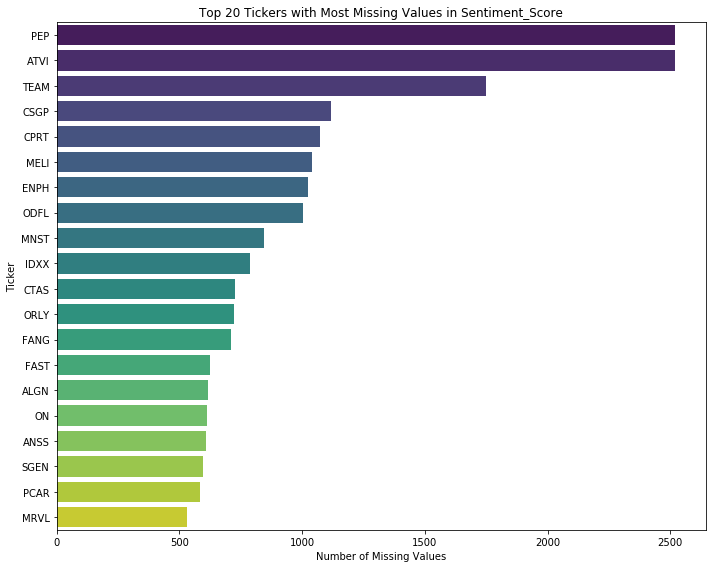

In [10]:
# Get the top 20 tickers with the most missing values in 'Sentiment_Score'
top_20_missing = missing_values_by_ticker.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_missing.values, y=top_20_missing.index, palette="viridis")
plt.title('Top 20 Tickers with Most Missing Values in Sentiment_Score')
plt.xlabel('Number of Missing Values')
plt.ylabel('Ticker')
plt.tight_layout()

plt.show()

# Exploratory Data Analysis (EDA)


## 5.1 Descriptive Statistics


First, let's provide a summary of the dataset's main characteristics using descriptive statistics. This includes measures such as mean, standard deviation, minimum and maximum values for each column. We commence by summarizing the numerical attributes within our dataset.

In [1]:
import pandas as pd
merged_data = pd.read_csv("After_preprocessing.csv")

In [22]:
# Calculating summary statistics for the numerical columns
merged_data.describe().transpose().to_csv("descriptive_table.csv")

- Stock Prices (Open, High, Low, Close, Adj Close): The minimum price is 0.70 dollar while the maximum is 2,703.26 dollar. The distribution of prices appears to be right-skewed, as the mean is significantly greater than the median.

- Volume: The trading volume displays substantial variability, ranging from days with zero traded volume to those exceeding a billion.

- Sentiment_Score: The average sentiment score is around 0.67. However, this metric is susceptible to significant fluctuations, spanning from -96.88 to 66.62. This wide range underscores the immense variability in daily news sentiment for different firms.

- New_Covid_Cases: The mean daily count of new COVID-19 cases in the US stands at approximately 28,570. With the maximum number of cases recorded in a single day being over 1.26 million, it underscores the magnitude of the pandemic's peak phases.

- MarketCap: The companies' market capitalization exhibits a wide range, spanning from roughly 15 billion dollar to a staggering 2.8 trillion dollar.

## 5.2 Data Visualization


### 5.2.1 Distribution of Sentiment Score
First, we'll plot the distribution of the Sentiment_Score variable to understand how news sentiments are distributed over the entire dataset.

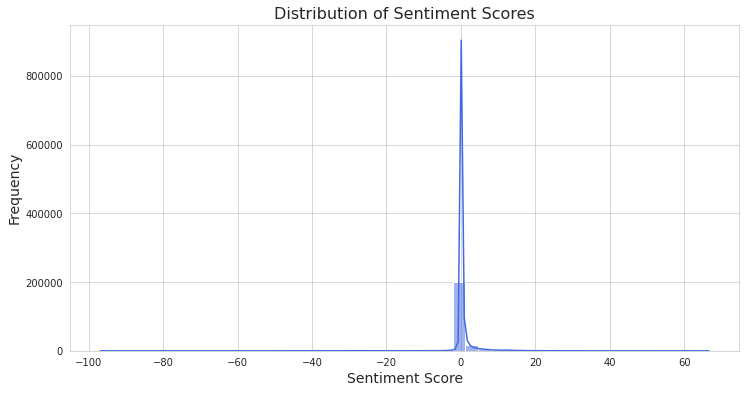

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")

# Plot distribution of Sentiment_Score
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['Sentiment_Score'], bins=50, color='royalblue', kde=True)
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig("Distribution of Sentiment Score.pdf", format='pdf')
plt.show()


The histogram illustrates the distribution of the sentiment scores. A few observations can be made:

A major portion of the sentiment scores is clustered around the 0 mark, indicating many days have neutral or minimal sentiment.
The distribution shows slight positive skewness, with a significant number of days having positive sentiment scores.
There are fewer days with strongly negative sentiment scores compared to those with positive scores. However, the existence of both positive and negative extremes indicates significant news events that have affected the stock market.

### 5.2.2 Temporal Evolution of Average Sentiment

To understand how the sentiment has evolved over time, we'll plot the average sentiment score over our timeframe. This will be instrumental in discerning any discernible patterns or shifts in sentiment, especially around significant market or global events.

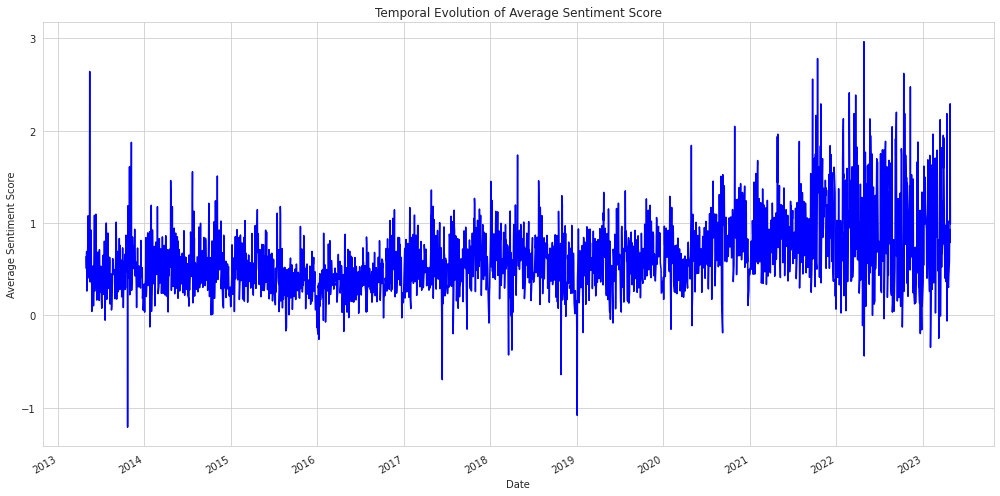

In [33]:
# Convert the 'Date' column to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Group by date and calculate the mean sentiment score
avg_sentiment = merged_data.groupby('Date')['Sentiment_Score'].mean()

# Plotting
plt.figure(figsize=(14, 7))
avg_sentiment.plot(color='blue')
plt.title('Temporal Evolution of Average Sentiment Score')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart elucidates the temporal evolution of the average sentiment scores across our dataset. Key insights include:

- The sentiment scores exhibit fluctuations over time, reflecting the dynamic nature of news and its inherent variability.
- While there are periods of relative stability, we observe pronounced spikes and troughs at certain intervals. These could correspond to significant market events, corporate announcements, or global occurrences.
- The sentiment seems to experience volatility, especially around 2020, potentially alluding to the onset and progression of the COVID-19 pandemic and its multifaceted impact on global markets.

Understanding the temporal dynamics of sentiment scores is imperative. It offers a lens through which we can contextualize stock returns and assess if and how significant events manifest in news sentiment.

### 5.2.3 Average Sentiment Score by Company

By examining the average sentiment scores across various companies, we can discern patterns or biases in news coverage. For instance, certain companies might consistently receive positive news coverage due to their strategic decisions, innovations, or corporate governance, while others might often be portrayed in a negative light.

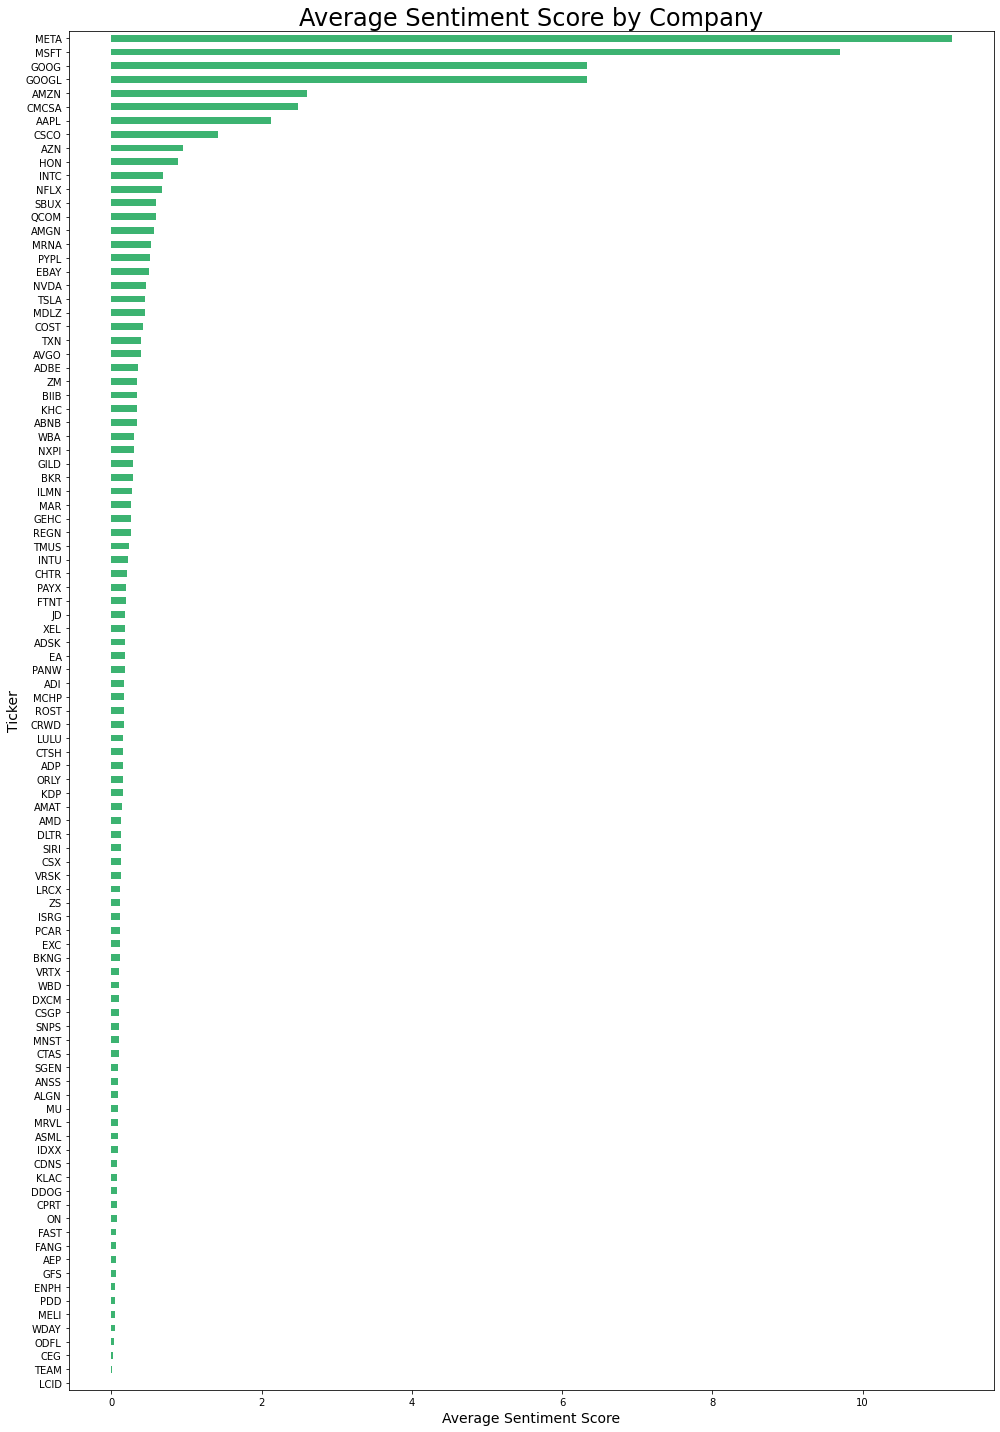

In [22]:
# Calculating average sentiment score for each company
avg_sentiment_per_company = merged_data.groupby('Ticker')['Sentiment_Score'].mean().sort_values()

# Plotting the average sentiment scores for each company
plt.figure(figsize=(14, 20))
avg_sentiment_per_company.plot(kind='barh', color='mediumseagreen')
plt.title('Average Sentiment Score by Company', fontsize=24)
plt.xlabel('Average Sentiment Score', fontsize=14)
plt.ylabel('Ticker', fontsize=14)
plt.tight_layout()
plt.savefig("Average Sentiment Score by Company.pdf", format='pdf')
plt.show()


In [46]:
avg_sentiment_per_company.to_frame().reset_index()

,Ticker,Sentiment_Score
0,LCID,-0.009985
1,TEAM,0.012630
2,CEG,0.017383
3,ODFL,0.034202
4,WDAY,0.041311
...,...,...
94,AMZN,2.603217
95,GOOGL,6.325854
96,GOOG,6.325854
97,MSFT,9.695711


In [45]:
latest_market_cap = merged_data.groupby("Ticker").last()["MarketCap"]
latest_market_cap

Ticker
AAPL    2828020482048
ABNB      87952080896
ADBE     237289472000
ADI       93569613824
ADP      102594969600
            ...      
WBD       35128709120
WDAY      59387936768
XEL       32823230464
ZM        20099164160
ZS        20233623552
Name: MarketCap, Length: 99, dtype: int64

In [52]:
avg_sentiment = avg_sentiment_per_company.to_frame().reset_index().set_index('Ticker').join(latest_market_cap).reset_index()
avg_sentiment.to_csv("average sentiment score with marketcap.csv", index=False)

The horizontal bar chart illuminates the average sentiment scores for various companies over the dataset's duration:

- Companies exhibit a broad spectrum of average sentiment scores, ranging from slightly negative to notably positive. This diversity in sentiment underscores the differential media portrayal and news coverage these entities receive.
- A majority of the firms cluster around a neutral average sentiment, indicative of balanced news coverage over the period.
- Certain companies like 'ZS', 'WBA', and 'WBD' tend towards the positive end, suggesting consistent favorable news coverage. Conversely, firms like 'DDOG', 'LCID', and 'GEHC' lean towards the negative end, implying that they might have been subjects of more critical or unfavorable news.
- The disparities in sentiment scores across companies might be attributed to a myriad of factors – from sectoral influences, corporate strategies, financial performance, to market positioning.

Unearthing these company-specific sentiment patterns offers valuable insights, enabling a nuanced understanding of the intricate interplay between news sentiment, stock returns, and company attributes.

### 5.2.4 Time Series of New COVID-19 Cases

In [19]:
import matplotlib.pyplot as plt
merged_data = pd.read_csv("After_preprocessing.csv")

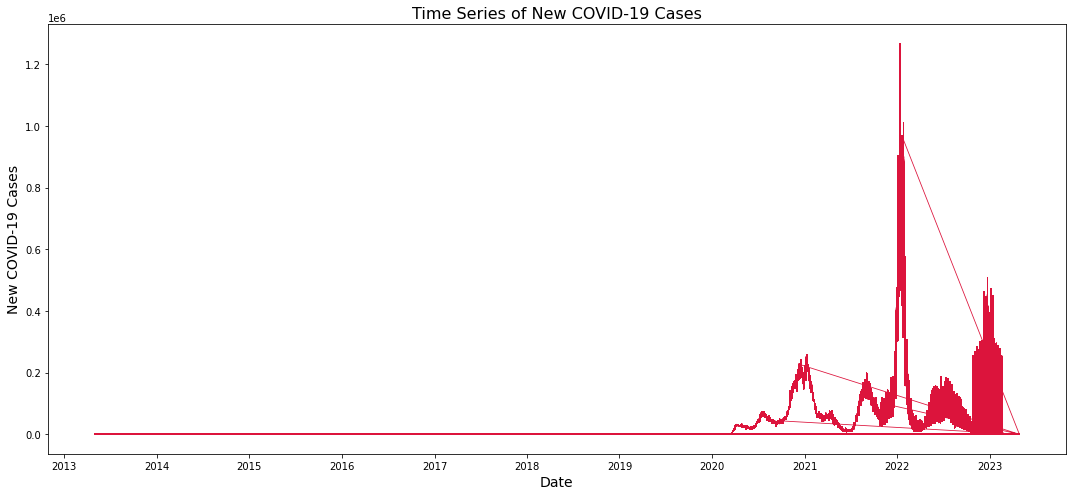

In [16]:
# Efficiently plotting Time Series of New_Covid_Cases using matplotlib
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
plt.figure(figsize=(15, 7))
plt.plot(merged_data['Date'], merged_data['New_Covid_Cases'], color='crimson', linewidth=0.8)
plt.title('Time Series of New COVID-19 Cases', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New COVID-19 Cases', fontsize=14)
plt.tight_layout()
plt.savefig("New COVID-19 Cases.pdf", format='pdf')
plt.show()


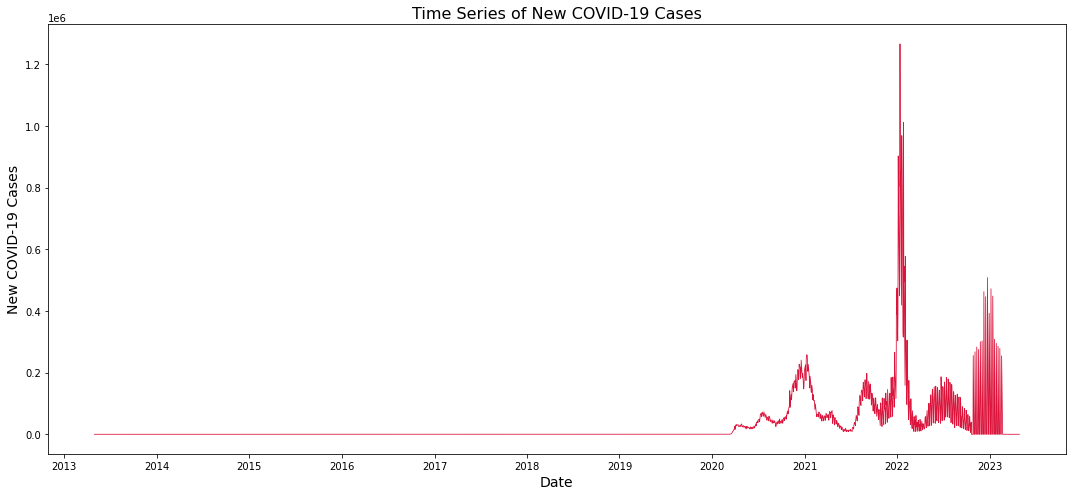

In [20]:
import matplotlib.pyplot as plt
import pandas as pd


# Sorting data by Date
merged_data = merged_data.sort_values(by="Date")

# Efficiently plotting Time Series of New_Covid_Cases using matplotlib
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
plt.figure(figsize=(15, 7))
plt.plot(merged_data['Date'], merged_data['New_Covid_Cases'], color='crimson', linewidth=0.8)
plt.title('Time Series of New COVID-19 Cases', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New COVID-19 Cases', fontsize=14)
plt.tight_layout()
plt.show()


The time series plot illustrates the progression of new COVID-19 cases over the study period:

- Initially, there were minimal or no reported cases until early 2020, marking the onset of the pandemic.
- The cases surged in waves, peaking in late 2020 and early 2021, followed by another spike towards the end of 2021.
- After the peaks, there were periods of decline, indicating efforts to control the pandemic, potentially through lockdowns, vaccination drives, and other preventive measures.
- By the end of the study period, the number of new cases had decreased, but periodic fluctuations were still evident.

### 5.2.5 Time Series Plot of Close Prices
We will observe the trend in closing prices over time for all companies in our dataset. This visualization will provide insights into the overall market trend and highlight any significant market movements.

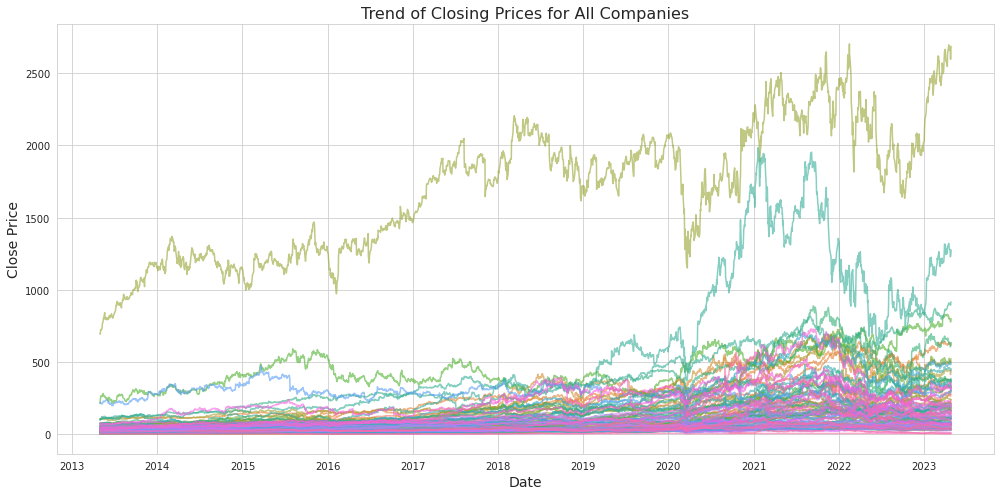

In [35]:
# Plotting the closing prices over time for all companies
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_data, x='Date', y='Close', hue='Ticker', legend=False, alpha=0.6)
plt.title('Trend of Closing Prices for All Companies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.tight_layout()
plt.savefig("Time Series Plot of Close Prices.pdf", format='pdf')
plt.show()


The plot visualizes the trends in closing prices over the entire duration for the myriad of companies in our dataset:

- The plot captures the multifarious trajectories of different companies, underscoring the disparate impacts of global and company-specific events on stock prices.
- Some stocks demonstrate pronounced growth, while others remain relatively stable. There are also instances of stocks exhibiting volatile fluctuations.
- The dense overlapping of lines, especially during the pandemic era, encapsulates the increased market volatility and the synchronous movement of multiple stocks, which is characteristic of global events with widespread financial implications.